# Biodiversity Portfolio Project (Codecademy Data Science)

**Please note** that the **data wrangling** takes place in the **first** of these two notebooks, and the **data analysis** takes place in the **second** of these two notebooks (**this one**). 

# Data Analysis

#### Importing Modules

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

#### Importing new_df and new_species dataframes

In [8]:
new_df = pd.read_csv('new_df.csv', index_col=[0])

In [16]:
new_species = pd.read_csv('new_species.csv', index_col=[0])

## Question 1: Are certain categories of species more likely to have been granted a conservation status? If so, does this hold true for all of the conservation statuses?

## *Are certain categories of species more likely to have been granted a conservation status?*

Countplot of Categories Against Countplot of All Species with a Conservation Status by Category

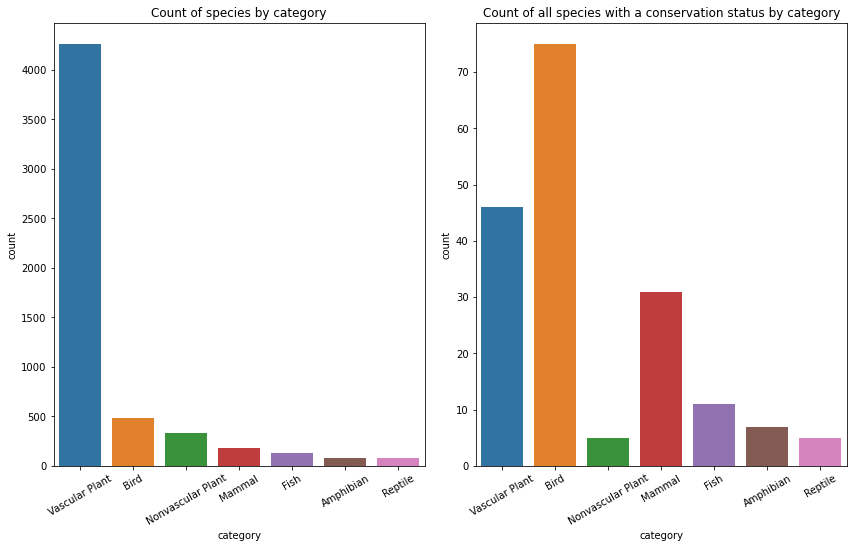

<Figure size 432x288 with 0 Axes>

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12,7))
fig.tight_layout(pad=2.0)

cat_order = new_species.category.value_counts().index

sns.countplot(ax=axes[0], x='category', data=new_species, order=cat_order)
axes[0].set_title('Count of species by category')
axes[0].set_xticklabels(labels = cat_order, rotation = 30)

sns.countplot(ax=axes[1], x=new_species.category[new_species.conservation_status.notnull()], order=cat_order)
axes[1].set_title('Count of all species with a conservation status by category')
axes[1].set_xticklabels(labels = cat_order, rotation = 30)

plt.show()
plt.clf()

It is immediately obvious from this graph that at least two categories of species are disproportionally represented - birds and mammals. Fish, amphibians and reptiles seem slightly overrepresented. Both plant categories seem underrepresented.

Crosstabulation of category against conservation status/ no conservation status (for all species, i.e. including NaNs)

In [29]:
new_species['con_status'] = new_species.conservation_status.apply(lambda x: 'No Conservation Status' if x != x else 'Conservation Status')
xtab_all = pd.crosstab(new_species.category, new_species.con_status)
xtab_all

con_status,Conservation Status,No Conservation Status
category,,
Amphibian,7,72
Bird,75,413
Fish,11,115
Mammal,31,146
Nonvascular Plant,5,328
Reptile,5,73
Vascular Plant,46,4216


Running a Chi Square Test to evaluate whether we can reject the null hypothesis (i.e. that that no relationship exists between these variables; they are independent).

In [30]:
chi2, pval, dof, expected = stats.chi2_contingency(xtab_all)
pval

3.107572119896011e-90

This is a very strong correlation! This is very strong statistical evidence that there is a correlation between category of species and whether that species has been granted a conservation status. We can thus already answer our question: **certain species are more likely to be have been granted a conservation status.**

We can disaggregate this further by running Fisher's exact test on each of these categories. Fisher's exact test only works on 2x2 crosstabulations, so in this case we are examining whether there is a correlation between, for example, being either 'bird' or 'not bird' and 'conservation status' and 'no conservation status'.

In [33]:
new_species

,category,scientific_name,common_names,conservation_status,con_status
861,Vascular Plant,Iva annua,Iva,NaN,No Conservation Status
1434,Vascular Plant,Quercus,Oak,NaN,No Conservation Status
151,Bird,Philomachus pugnax,Ruff,NaN,No Conservation Status
2113,Vascular Plant,Juncus dichotomus,Rush,NaN,No Conservation Status
2527,Vascular Plant,Pyrus,Pear,NaN,No Conservation Status
...,...,...,...,...,...
4274,Vascular Plant,Polypogon monspeliensis,"Annual Rabbitsfoot Grass, Annual Rabbit's-Foot...",NaN,No Conservation Status
3423,Vascular Plant,Bidens cernua,"Bur Marigold, Nodding Beggartick, Nodding Begg...",NaN,No Conservation Status
3034,Mammal,Corynorhinus townsendii,"Mule-Eared Bat, Pacific Townsend's Big-Eared B...",NaN,No Conservation Status
3562,Vascular Plant,Tragopogon dubius,"Common Salsify, Goat's Beard, Goatsbeard, Mead...",NaN,No Conservation Status


In [34]:
xtab_vplant = pd.crosstab(new_species.category.apply(lambda x: 'Vascular Plant' if x == 'Vascular Plant' else 'Not Vascular Plant'), new_species.con_status)
xtab_bird = pd.crosstab(new_species.category.apply(lambda x: 'Bird' if x == 'Bird' else 'Not Bird'), new_species.con_status)
xtab_nvplant = pd.crosstab(new_species.category.apply(lambda x: 'Nonvascular Plant' if x == 'Nonvascular Plant' else 'Not Nonvascular Plant'), new_species.con_status)
xtab_mammal = pd.crosstab(new_species.category.apply(lambda x: 'Mammal' if x == 'Mammal' else 'Not Mammal'), new_species.con_status)
xtab_fish = pd.crosstab(new_species.category.apply(lambda x: 'Fish' if x == 'Fish' else 'Not Fish'), new_species.con_status)
xtab_amphibian = pd.crosstab(new_species.category.apply(lambda x: 'Amphibian' if x == 'Amphibian' else 'Not Amphibian'), new_species.con_status)
xtab_reptile = pd.crosstab(new_species.category.apply(lambda x: 'Reptile' if x == 'Reptile' else 'Not Reptile'), new_species.con_status)

In [38]:
oddsratio, pvalue = stats.fisher_exact(xtab_vplant)
print('For vascular plants, the test returned a p-value of {}; the variables are correlated.'.format(pvalue))
oddsratio, pvalue = stats.fisher_exact(xtab_bird)
print('\nFor birds, the test returned a p-value of {}; the variables are correlated.'.format(pvalue))
oddsratio, pvalue = stats.fisher_exact(xtab_nvplant)
print('\nFor nonvascular plants, the test returned a p-value of {}, thus we are unable to reject the null hypothesis and say that the variables are correlated'.format(pvalue))
oddsratio, pvalue = stats.fisher_exact(xtab_mammal)
print('\nFor mammals, the test returned a p-value of {}; the variables are correlated.'.format(pvalue))
oddsratio, pvalue = stats.fisher_exact(xtab_fish)
print('\nFor fish, the test returned a p-value of {}; the variables are correlated.'.format(pvalue))
oddsratio, pvalue = stats.fisher_exact(xtab_amphibian)
print('\nFor amphibians, the test returned a p-value of {}; the variables are correlated.'.format(pvalue))
oddsratio, pvalue = stats.fisher_exact(xtab_reptile)
print('\nFor reptiles, the test returned a p-value of {}, thus we are unable to reject the null hypothesis and say that the variables are correlated.'.format(pvalue))

For vascular plants, the test returned a p-value of 6.967904370389874e-50; the variables are correlated.

For birds, the test returned a p-value of 5.934247481276106e-34; the variables are correlated.

For nonvascular plants, the test returned a p-value of 0.07679632385919685, thus we are unable to reject the null hypothesis and say that the variables are correlated

For mammals, the test returned a p-value of 3.638754672793725e-15; the variables are correlated.

For fish, the test returned a p-value of 0.002461088052241379; the variables are correlated.

For amphibians, the test returned a p-value of 0.013717237288072582; the variables are correlated.

For reptiles, the test returned a p-value of 0.108495766262549, thus we are unable to reject the null hypothesis and say that the variables are correlated.


This is a very robust finding that the category of animal has an effect on whether the species has a conservation status or not: not only did we prove an extremely strong correlation between category and being granted a conservation status overall with the chi square test above, 5 of the 7 individual categories reached significance!

Perhaps most interesting is which categories have the strongest correlations. Three categories have *extremely* strong correlations: vascular plants, birds, and mammals. We can see from the visualisations above that vascular plants are much less likely to be granted a conservation status than other categories, whereas birds and mammals are much more likely to be granted a conservation status than other categories.

## *If so, does this hold true for all of the conservation statuses?*

Having proven a robust correlation between whether a species has been granted **any** conservation status and the category the species is in, the logical next question is: does this correlation hold when he disaggregate 'conservation status' into the various different conservation statuses (species of concern, endangered, threatened, and in recovery)?

Crosstabulation of category against conservation status (for species with any conservation status)

In [36]:
xtab = pd.crosstab(new_species.category, new_species.conservation_status)
xtab

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1,0,4,2
Bird,4,3,68,0
Fish,3,0,4,4
Mammal,6,1,22,2
Nonvascular Plant,0,0,5,0
Reptile,0,0,5,0
Vascular Plant,1,0,43,2


Running a Chi Square Test to evaluate whether we can reject the null hypothesis (i.e. that that no relationship exists between these variables; they are independent)

In [37]:
chi2, pval, dof, expected = stats.chi2_contingency(xtab)
pval

3.8820626978199296e-05

This chi square shows a significantly weaker correlation than when we aggregated the various conservation statuses into a binary category: conservation status/ no conservation status. This may well be because of a lack of data (there are only 4 species in 'In Recovery', for example).

When we disaggregate conservation status into two broad categories: 'Species of Concern' and the other categories ('Endangered', 'Threatened', and 'In Recovery'), we can see why there is a weaker correlation when we run the chi square immediately above as opposed to the chi square test where we aggregated all the conservation statuses together.

Countplot of Species by Category Against Countplot of Species of Concern by Category

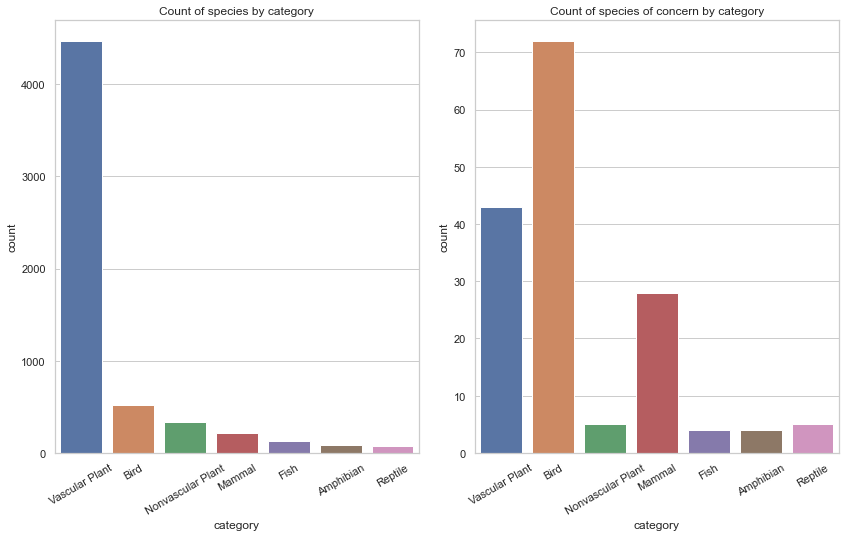

<Figure size 432x288 with 0 Axes>

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12,7))
fig.tight_layout(pad=2.0)

sns.countplot(ax=axes[0], x='category', data=species, order=cat_order)
axes[0].set_title('Count of species by category')
axes[0].set_xticklabels(labels = cat_order, rotation = 30)

sns.countplot(ax=axes[1], x=species.category[species.conservation_status == 'Species of Concern'], order=cat_order)
axes[1].set_title('Count of species of concern by category')
axes[1].set_xticklabels(labels = cat_order, rotation = 30)

plt.show()
plt.clf()

Countplot of Species by Category Against Countplot of Other Conservation Statuses (ETIR) by Category

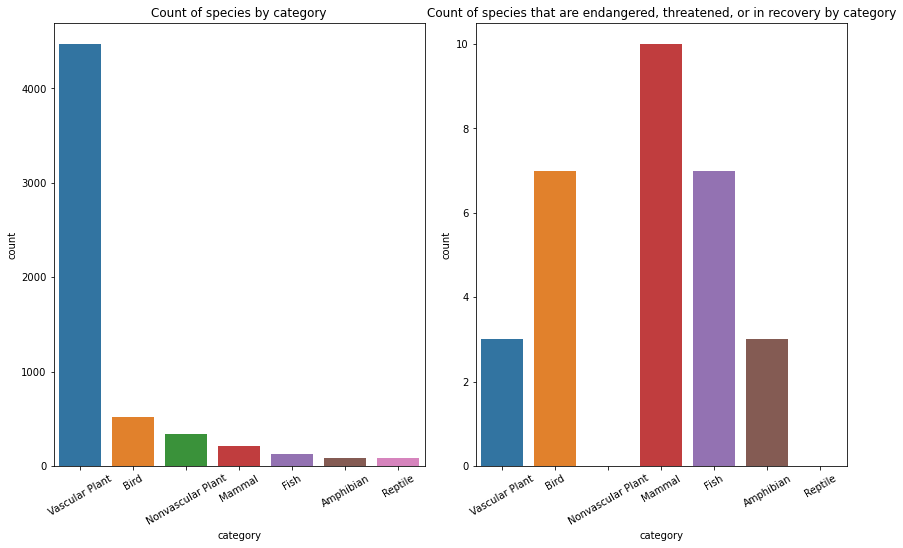

<Figure size 432x288 with 0 Axes>

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12,7))
fig.tight_layout(pad=2.0)

sns.countplot(ax=axes[0], x='category', data=species, order=category_order)
axes[0].set_title('Count of species by category')
axes[0].set_xticklabels(ax.get_xticklabels(),rotation = 30)
sns.countplot(ax=axes[1], x=species.category.loc[(species.conservation_status == 'Endangered') | (species.conservation_status == 'Threatened') | (species.conservation_status == 'In Recovery')], order=category_order)
axes[1].set_title('Count of species that are endangered, threatened, or in recovery by category')
axes[1].set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()
plt.clf()

Why are these graphs so different? In particular, why does 'Species of Concern' look so much like the countplots above, whereas aggregating the other three conservation statuses results in a completely different plot? 

Well, if we look at some basic summary statistics on the conservation statuses, we can answer the question:

Frequency Table for Conservation Statuses

In [127]:
# Frequency table
cat_value = species.conservation_status.value_counts().to_frame()
# Frequency table by proportion
cat_value_pc = species.conservation_status.value_counts(normalize=True).to_frame()
# Renaming the columnn
cat_value_pc = cat_value_pc.rename({'conservation_status': 'by_proportion'}, axis='columns')
# Joining the tables
cat_value = cat_value.join(cat_value_pc)
cat_value

,conservation_status,by_proportion
Species of Concern,161,0.842932
Endangered,16,0.083770
Threatened,10,0.052356
In Recovery,4,0.020942


Countplot of Conservation Statuses

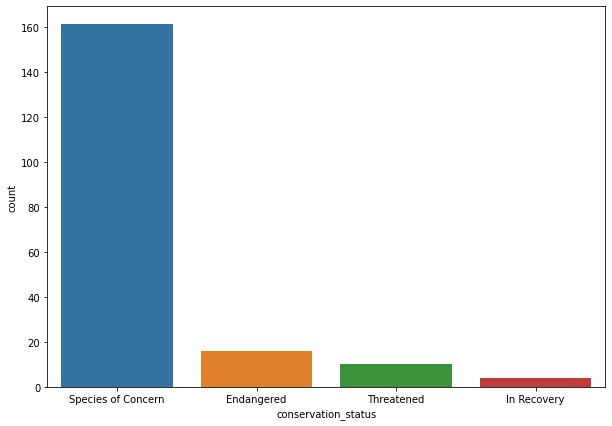

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x='conservation_status', data=species, order=cs_order)
plt.show()
plt.clf()

The reason the correlation between category and the different conservation statuses is weaker than the correlation between category and conservation status/ no conservation status is because there are so few species listed as 'Endangered', 'Threatened', and 'In Recovery' that the sample size is too small to draw effective conclusions.

**Overall, certain categories of species are disproportionately likely to be granted a conservation status. This is broadly true even for individual conservation statuses, although there are so few species listed in some categories (such as 'In Recovery') that the broader trends are not evident.**

**Birds and mammals, in particular, are much more likely to be granted a conservation status than other categories, and vascular plants much less likely to be granted a conservation status than other categories.**

## Question 2: Are species with conservation statuses observed more or less than species without conservation statuses? Does this change between national parks?

Quick note: every species in this dataset has a non-zero value in 'observations' for every park, so evaluating how many species with conservation statuses are in each park is beyond the reach of this dataset (because only species in every park are included in the dataset) - see tests below.

In [40]:
# Testing for NaNs
observations.observations.isna().sum()

0

In [41]:
# Testing for values that equal 0
len(observations[observations.observations == 0])

0

## *Are species with conservation statuses observed more or less than species without conservation statuses?*

To assess this question, this section will first visually examine the distribution of observations and descriptive statistics for the two different groups, before using a statistical test to assess the hypothesis that the means of the two groups are different in the population and not just our sample.

In [39]:
# Adding binary 'con_status' column to new_df
new_df['con_status'] = new_df.conservation_status.apply(lambda x: 'No Conservation Status' if x != x else 'Conservation Status')
new_df.head()

,scientific_name,park_name,total_observations,category,common_names,conservation_status,con_status
0,Abies bifolia,Bryce National Park,109,Vascular Plant,Rocky Mountain Alpine Fir,NaN,No Conservation Status
1,Abies bifolia,Great Smoky Mountains National Park,72,Vascular Plant,Rocky Mountain Alpine Fir,NaN,No Conservation Status
2,Abies bifolia,Yellowstone National Park,215,Vascular Plant,Rocky Mountain Alpine Fir,NaN,No Conservation Status
3,Abies bifolia,Yosemite National Park,136,Vascular Plant,Rocky Mountain Alpine Fir,NaN,No Conservation Status
4,Abies concolor,Bryce National Park,83,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN,No Conservation Status


In [44]:
new_df.con_status.value_counts()

No Conservation Status    21452
Conservation Status         720
Name: con_status, dtype: int64

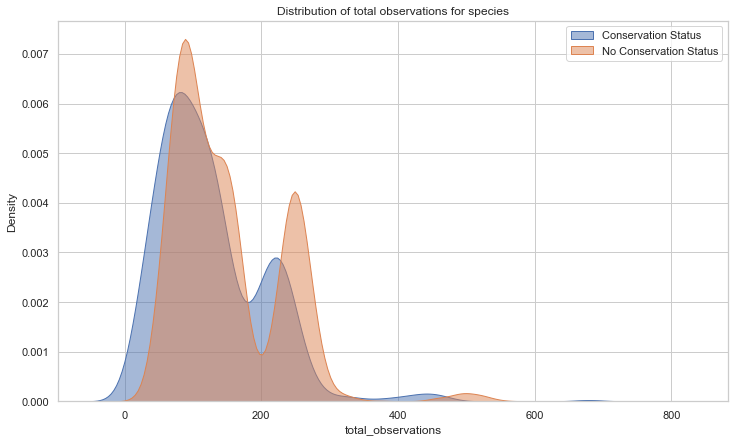

<Figure size 432x288 with 0 Axes>

In [45]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,7))
ax = sns.kdeplot(x='total_observations', data=new_df[new_df.con_status == 'Conservation Status'], fill=True, alpha=0.5, label='Conservation Status')
ax = sns.kdeplot(x='total_observations', data=new_df[new_df.con_status == 'No Conservation Status'], fill=True, alpha=0.5, label='No Conservation Status')
ax.set_title('Distribution of total observations for species')
plt.legend()
plt.show()
plt.clf()

This kernel density estimation plot establishes that both distributions have a very similar shape, but what can we say about the central tendency and spread of the data? One way of looking at this is to look at some summary statistics.

In [47]:
new_df.total_observations[new_df.con_status == 'Conservation Status'].describe()

count    720.000000
mean     126.143056
std       78.776212
min       11.000000
25%       69.000000
50%      109.000000
75%      168.000000
max      679.000000
Name: total_observations, dtype: float64

In [46]:
new_df.total_observations[new_df.con_status == 'No Conservation Status'].describe()

count    21452.000000
mean       150.356330
std         81.405849
min          9.000000
25%         88.000000
50%        130.000000
75%        219.000000
max        805.000000
Name: total_observations, dtype: float64

These statistics show a significant difference in the mean and median of the distributions that was not immediately apparent from the above visualisation. Let's visualise the data in a way that shows the median and interquartile range in order to better visualise spread and central tendency.

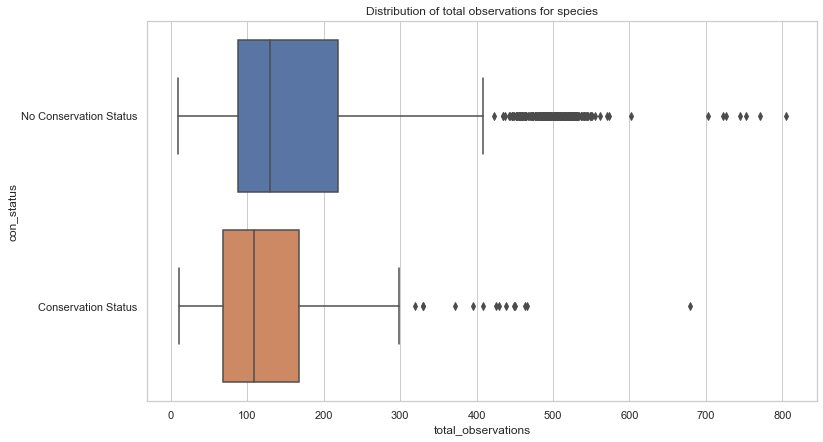

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(x='total_observations', y='con_status', data=new_df)
ax.set_title('Distribution of total observations for species')
plt.show()
plt.clf()

We can now see a clear difference between the groups of species with and without conservation statuses. To quantify this association between having a conservation status or not and total observations of the species in our dataset, we need to use a statistical test.

In this case, a two sample T test would usually be appropriate. However, the kde plots above appear to be bimodal. This is a problem because one of the assumptions of a two sample T test is that the distribution is (roughly) normal.

One way of testing whether a distribution is normal or not is the Shapiro-Wilk test.

In [52]:
stats.shapiro(new_df.total_observations[new_df.con_status == 'No Conservation Status'])

ShapiroResult(statistic=0.8861058950424194, pvalue=0.0)

In [49]:
stats.shapiro(new_df.total_observations[new_df.con_status == 'Conservation Status'])

ShapiroResult(statistic=0.889789342880249, pvalue=2.9677093666998473e-22)

A p-value of less than 0.05 indicates that the distribution is not normal - so we can definitely say that these data are not normally distributed!

In this case, we have to use the non-parametric alternative to the two sample T Test - the Mann-Whitney U test.

In [54]:
results = stats.mannwhitneyu(new_df.total_observations[new_df.con_status == 'No Conservation Status'], new_df.total_observations[new_df.con_status == 'Conservation Status'])
results

MannwhitneyuResult(statistic=9309097.0, pvalue=5.969368489177303e-21)

This is a very low p-value, and thus we can firmly reject the null hypothesis that there is no difference in the population means (we had, of course, already established a difference in the sample means).

**We can therefore say that, on average, species with a conservation status are observed less than species without a conservation status.**

## *Does this change between national parks?*

Now that we have established that species with a conservation status are observed less than species without a conservation status, we might ask: is this trend true independent of the national park the observations are made in?

Below we can see that the different national parks have different distributions of total observations, perhaps due to different park sizes, available staff, etc.

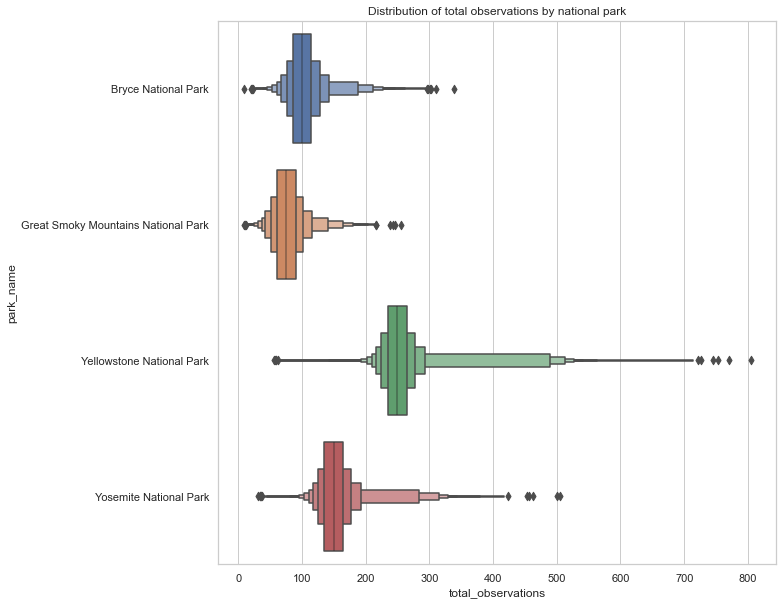

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize=(10,10))
ax = sns.boxenplot(y='park_name', x='total_observations', data=new_df)
ax.set_title('Distribution of total observations by national park')
plt.show()
plt.clf()

The above demonstrates that the baseline distribution of observations is different between parks, independent of the question of which kind of species (with or without a conservation status) are observed more. Let's separate out the observations into species with and without conservation statuses.

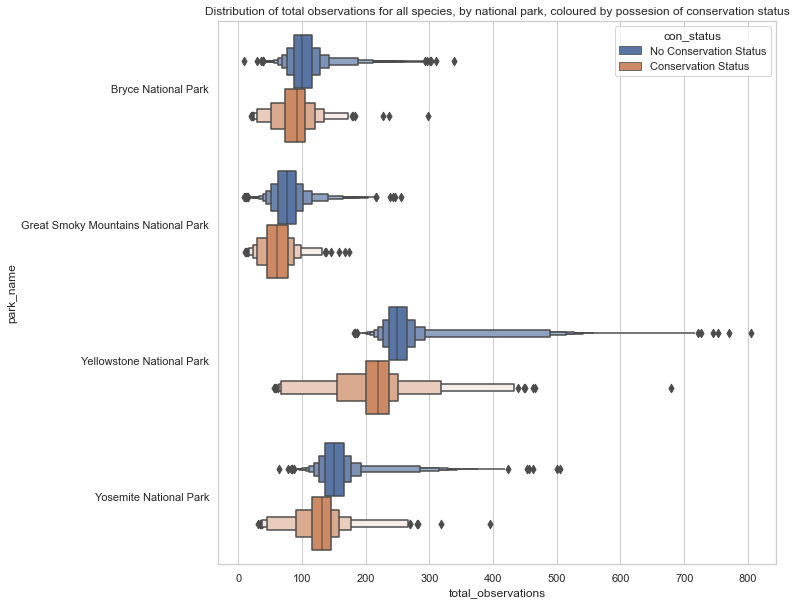

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(10, 10))
ax = sns.boxenplot(y='park_name', x='total_observations', hue= 'con_status', data=new_df)
ax.set_title('Distribution of total observations for all species, by national park, coloured by possesion of conservation status')
plt.show()
plt.clf()

This graph paints a clear picture: regardless of the national park, species with a conservation status are observed less than species without a conservation status. 

In particular, we can note that there is a higher median, minimum, and maximum value of total observations for species without a conservation status than for species with a conservation status *in every park*, which is fairly conclusive.

### Which park has the smallest difference between the two groups?

We might still be interested in a further question, however: does national park have an effect on the **difference** between species with and without conservation statuses? We might provisionally hypothesise that this differerence could serve as a rough metric for which parks are more successful in their conservation efforts than the others.

To answer this question, we need to ask which of the four pairs of distributions (conservation status/ no conservation status) corresponding to each park are most similar and most different. To do this, we can use the two-sided Kolmogorov-Smirnov test, which seeks to quantify the probability that two sets of samples were drawn from the same (unknown) probability distribution.

The null hypotheisis is that the two sample distributions were drawn from the same distribution, so the test that returns the lowest p-value has the highest probability that the samples were drawn from different populations, and is therefore the 'most different'. Therefore, the test that returns the highest p-value has the lowest probability that the samples were drawn from different populations, and is therefore the 'most similar'.

In [57]:
# Establishing the Categories

UT = new_df[new_df.con_status == 'Conservation Status']
NUT = new_df[new_df.con_status == 'No Conservation Status']

B_UT = UT.total_observations[UT.park_name == 'Bryce National Park']
B_NUT = NUT.total_observations[NUT.park_name == 'Bryce National Park']
GSM_UT = UT.total_observations[UT.park_name == 'Great Smoky Mountains National Park']
GSM_NUT = NUT.total_observations[NUT.park_name == 'Great Smoky Mountains National Park']
Y_UT = UT.total_observations[UT.park_name == 'Yellowstone National Park']
Y_NUT = NUT.total_observations[NUT.park_name == 'Yellowstone National Park']
Yo_UT = UT.total_observations[UT.park_name == 'Yosemite National Park']
Yo_NUT = NUT.total_observations[NUT.park_name == 'Yosemite National Park']

In [58]:
Bryce_results = stats.ks_2samp(B_UT, B_NUT, alternative='two-sided', mode='auto')
Bryce_results

KstestResult(statistic=0.19152422980504277, pvalue=4.5406776721934605e-06)

In [59]:
GSM_results = stats.ks_2samp(GSM_UT, GSM_NUT, alternative='two-sided', mode='auto')
GSM_results

KstestResult(statistic=0.266614871444258, pvalue=2.0452528559644634e-11)

In [60]:
Y_results = stats.ks_2samp(Y_UT, Y_NUT, alternative='two-sided', mode='auto')
Y_results

KstestResult(statistic=0.5117440487289452, pvalue=1.4432899320127035e-15)

In [61]:
Yo_results = stats.ks_2samp(Yo_UT, Yo_NUT, alternative='two-sided', mode='auto')
Yo_results

KstestResult(statistic=0.35753413305156734, pvalue=1.4432899320127035e-15)

It seems fairly clear from these results that Bryce National Park has the smallest difference between the two distributions (more strictly, the highest probability that the two distributions could have been drawn from the same population). We can see from the boxenplot above that this would match our assumptions from looking at the graphical representation: Bryce National Park has the closest median points and a similarly shaped distribution.

**Overall, species with a conservation status are observed less than species without a conservation status (this was established both graphically and with statistical tests).**

**Further, this is true for every national park (a fact that was also established graphically and statistically). Although all the national parks had significant disparities between observations of species that have been granted a conservation status and species that have not, Bryce National Park had the smallest disparity, perhaps suggesting more success in conservation efforts.**

# Conclusion

To conclude, the project succeed in answering the two questions set out at the outset.

First, certain categories of species are disproportionately likely to be granted a conservation status. This is broadly true even for individual conservation statuses, although there are so few species listed in some categories (such as 'In Recovery') that the broader trends are not evident.

Second, species with a conservation status are observed less than species without a conservation status across all four national parks, although Bryce National Park had the smallest disparity, perhaps suggesting more success in their conservation efforts.